In [2]:
from bs4 import BeautifulSoup
from urllib import request
from tqdm import tqdm
import pandas as pd
import numpy as np
import requests
import json
import re

dracor_api = "https://dracor.org/api"

In [3]:
def get_dracor(corpus, play=None):
    """Lädt entweder Metadaten zum Korpus oder den Text des Stücks."""
    url = dracor_api + "/corpora/" + corpus          # Basis-URL
    if play is not None:                             # Stück gewünscht?
        url = url + "/play/" + play + "/tei" # URL für Text des Stückes
    with request.urlopen(url) as req:                # Daten herunterladen
        text = req.read().decode()                   # Daten einlesen
        if play is None:                             # Stück gewünscht?
            return json.loads(text)                  # JSON der Korpusmetadaten parsen und zurückgeben
        return text                                  # Text des Stückes zurückgeben


def get_data(corpus):
    """Alle Stücke eines Korpus herunterladen."""
    texts = []                                       # Texte der Stücke
    target = []                                      # Autor*innen der Stücke
    playnames = []
    for drama in tqdm(get_dracor(corpus)["dramas"]):       # alle Stücke durchlaufen
        name = drama["name"]                         # Name des Stücks
        authors = drama["authors"]
        if name.startswith('corneillep'):
            if len(authors) == 1:                        # nur Stücke mit einem/r Autor*in
                texts.append(get_dracor(corpus, name))   # Text herunterladen
                target.append(authors[0]["fullname"])    # Autor*in hinzufügen
                playnames.append(name)
    return texts, playnames, target                             # Texte + Autor*innen als Ergebnis

texts, names, target = get_data("fre")

100%|██████████| 1560/1560 [00:25<00:00, 62.08it/s]


In [4]:
plays_df = pd.DataFrame({'name': names, 'text': texts, 'author': target})

In [5]:
list(plays_df.author.values)

['Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille',
 'Pierre Corneille']

In [6]:
gd = get_dracor('fre')

In [7]:
gd_data = []

for drama in gd['dramas']:
    if drama['name'].startswith('corneillep'):
        tei = requests.get('https://dracor.org/api/corpora/fre/play/'+drama['name']+'/tei').text
        gd_data.append({'name': drama['name'], 'tei': tei})

In [8]:
df = pd.DataFrame(gd_data)

In [9]:
df

,name,tei
0,corneillep-agesilas,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
1,corneillep-andromede,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
2,corneillep-attila,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
3,corneillep-cid-37,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
4,corneillep-cid,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
5,corneillep-cinna-43,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
6,corneillep-cinna,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
7,corneillep-clitandre,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
8,corneillep-don-sanche,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
9,corneillep-galerie-du-palais,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."


In [17]:
comedies_indices = [[15], [35, 9, 30, 23, 12], [17, 29]]
tragedies_indices = [[7], [13, 3], [11, 5, 24, 18], [32, 26, 10, 19, 22, 20, 27, 28, 21, 2, 31]]

In [63]:
# play_texts = {}
# for index in np.concatenate(comedies_indices+tragedies_indices):
#     soup = BeautifulSoup(df.values[index][1], 'lxml')
#     text = soup.find('text')
#     play_texts[df.values[index][0]] = text

## Подсчёты

### Основной материал

In [18]:
def flatten(l):
    flat_l = []
    for item in l:
        flat_l.extend(item)
    return flat_l

In [19]:
comedies_indices_flat = flatten(comedies_indices)
tragedies_indices_flat = flatten(tragedies_indices)

In [20]:
def collect_year(tei):
    header = tei.find('teiheader')
    if header.find('date', {'type': 'premiere'}):
        return int(header.find('date', {'type': 'print'})['when'])
    elif header.find('date', {'type': 'print'}):
        return int(header.find('date', {'type': 'premiere'})['when'])
    else:
        return 0

def collect_persons_number(tei):
    header = tei.find('teiheader')
    persons = header.find_all('person')
    return len(persons)

def collect_verses_number(tei):
    ls = tei.find('text').find_all('l')
    if 'n' in ls[0].attrs:
        return(int(ls[-1]['n']))
    l_counter = 0
    for l in ls:
        if 'part' in l.attrs:
            if l['part'] == 'I':
                l_counter += 1
        else:
            l_counter += 1
    return l_counter

def collect_cues_number(tei):
    return len(tei.find_all('sp'))

def collect_scenes_number(tei):
    return len(tei.find_all('div', {'type': 'scene'}))

def collect_breaking_verses_number(tei):
    l_part = tei.find_all('l', {'part': re.compile("M|F")})
    return len(l_part)
    
def collect_primary_data(tei):
    year = collect_year(tei)
    persons = collect_persons_number(tei)
    verses = collect_verses_number(tei)
    cues = collect_cues_number(tei)
    scenes = collect_scenes_number(tei)
    breaking_verses = collect_breaking_verses_number(tei)
    return year, persons, verses, cues, scenes, breaking_verses

In [21]:
comedies_datalist = []
for period, comedies in enumerate(comedies_indices):
    for ix in comedies:
        df_row = df.values[ix]
        name = df_row[0]
        primary_data = collect_primary_data(BeautifulSoup(df_row[1], 'lxml'))
        comedies_datalist.append(
            {
                'name': name,
                'date': primary_data[0],
                'period': period+1,
                'characters': primary_data[1],
                'verses': primary_data[2],
                'cues': primary_data[3],
                'scenes': primary_data[4],
                'breaking_verses': primary_data[5],
                'tei': str(df_row[1])
            }
        )

In [22]:
df_comedies_data = pd.DataFrame(comedies_datalist)

In [23]:
df_comedies_data

,name,date,period,characters,verses,cues,scenes,breaking_verses,tei
0,corneillep-melite-33,1633,1,8,2020,510,37,97,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
1,corneillep-veuve-34,1634,2,12,2350,521,40,97,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
2,corneillep-galerie-du-palais,1637,2,12,1794,517,54,65,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
3,corneillep-suivante,1637,2,10,1706,410,47,50,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
4,corneillep-place-royale,1637,2,8,1529,274,36,53,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
5,corneillep-illusion-comique,1639,2,12,1690,422,40,81,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
6,corneillep-menteur,1644,3,10,1804,651,36,159,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
7,corneillep-suite-menteur,1645,3,7,1904,651,31,171,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."


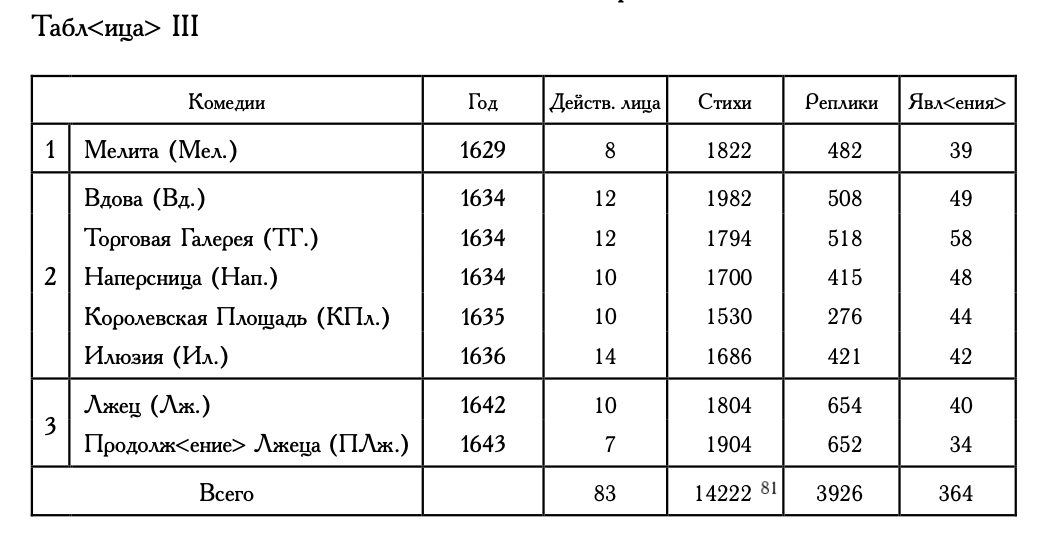

In [24]:
tragedies_datalist = []
for period, tragedies in enumerate(tragedies_indices):
    for ix in tragedies:
        df_row = df.values[ix]
        name = df_row[0]
        primary_data = collect_primary_data(BeautifulSoup(df_row[1], 'lxml'))
        tragedies_datalist.append(
            {
                'name': name,
                'date': primary_data[0],
                'period': period+1,
                'characters': primary_data[1],
                'verses': primary_data[2],
                'cues': primary_data[3],
                'scenes': primary_data[4],
                'breaking_verses': primary_data[5],
                'tei': str(df_row[1])
            }
        )

In [25]:
df_tragedies_data = pd.DataFrame(tragedies_datalist)

In [26]:
df_tragedies_data[df_tragedies_data['period'] != 4]

,name,date,period,characters,verses,cues,scenes,breaking_verses,tei
0,corneillep-clitandre,1682,1,16,1626,283,35,45,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
1,corneillep-medee-39,1639,2,9,1656,213,25,25,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
2,corneillep-cid-37,1637,2,12,1866,380,32,70,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
3,corneillep-horace,1641,3,10,1788,194,28,24,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
4,corneillep-cinna-43,1643,3,9,1780,217,20,28,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
5,corneillep-polyeucte,1643,3,9,1828,389,27,80,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."
6,corneillep-mort-pompee,1644,3,12,1842,190,22,18,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l..."


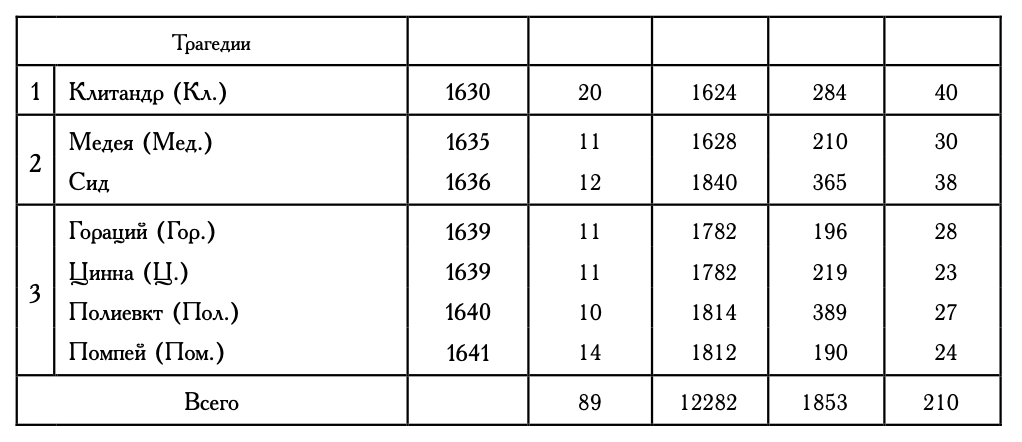

In [27]:
df_comedies_data.verses.mean()

1849.625

In [28]:
df_comedies_data.cues.mean()

494.5

In [29]:
df_tragedies_data[df_tragedies_data['period'] != 4].verses.mean()

1769.4285714285713

In [30]:
df_tragedies_data[df_tragedies_data['period'] != 4].cues.mean()

266.57142857142856

In [31]:
df_tragedies_data['genre'] = 'tragedy'

In [32]:
df_comedies_data['genre'] = 'comedy'

In [33]:
df_plays = pd.concat([df_comedies_data, df_tragedies_data])

In [34]:
def separate_value_by_genre(value, tragedy4=True):
    val_comedy = df_plays[df_plays['genre'] == 'comedy'][value]
    val_tragedy = df_plays[df_plays['genre'] == 'tragedy'][value]
    if tragedy4:
        val_tragedy13 = df_plays[(df_plays['genre'] == 'tragedy') & (df_plays['period'] != 4)][value]
        val_tragedy4 = df_plays[(df_plays['genre'] == 'tragedy') & (df_plays['period'] == 4)][value]
        return {'comedy': val_comedy,
                'tragedy13': val_tragedy13,
                'tragedy4': val_tragedy4,
                'tragedy': val_tragedy}
    else:
        return {'comedy': val_comedy,
                'tragedy': val_tragedy}

In [35]:
def separate_value_by_period(value):
    val1 = df_plays[df_plays['period'] == 1][value]
    val2 = df_plays[df_plays['period'] == 2][value]
    val3 = df_plays[df_plays['period'] == 3][value]
    val4 = df_plays[df_plays['period'] == 4][value]
    return val1, val2, val3, val4

In [36]:
def separate_value_by_genre_and_period(value):
    val_comedy = list(df_plays[df_plays['genre'] == 'comedy'].groupby('period'))
    val_tragedy = list(df_plays[df_plays['genre'] == 'tragedy'].groupby('period'))
    return {
        'comedy': {row[0]: row[1][value] for row in val_comedy},
        'tragedy': {row[0]: row[1][value] for row in val_tragedy}
    }

## Диалог
### Живость диалога

In [37]:
df_plays

,name,date,period,characters,verses,cues,scenes,breaking_verses,tei,genre
0,corneillep-melite-33,1633,1,8,2020,510,37,97,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
1,corneillep-veuve-34,1634,2,12,2350,521,40,97,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
2,corneillep-galerie-du-palais,1637,2,12,1794,517,54,65,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
3,corneillep-suivante,1637,2,10,1706,410,47,50,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
4,corneillep-place-royale,1637,2,8,1529,274,36,53,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
5,corneillep-illusion-comique,1639,2,12,1690,422,40,81,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
6,corneillep-menteur,1644,3,10,1804,651,36,159,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
7,corneillep-suite-menteur,1645,3,7,1904,651,31,171,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy
0,corneillep-clitandre,1682,1,16,1626,283,35,45,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",tragedy
1,corneillep-medee-39,1639,2,9,1656,213,25,25,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",tragedy


In [38]:
df_plays['vivacity'] = df_plays.cues / df_plays.verses

In [39]:
vivacity_by_genre = separate_value_by_genre('vivacity')

In [40]:
vivacity_by_genre['comedy'].mean()

0.26679640058366194

In [41]:
vivacity_by_genre['tragedy'].mean()

0.1589462244882886

In [42]:
vivacity_by_genre['comedy'].mean() / vivacity_by_genre['tragedy'].mean()

1.678532481300428

In [43]:
def MP_AC(sorted_desc_numbers1, sorted_desc_numbers2):
    i = 0
    j = 0
    if sorted_desc_numbers1[0] >= sorted_desc_numbers2[0]:
        number1 = sorted_desc_numbers1[0]
        number2 = sorted_desc_numbers2[0]
    else:
        number1 = sorted_desc_numbers2[0]
        number2 = sorted_desc_numbers1[0]
    
    while number1 > number2:
        number1 = sorted_desc_numbers1[i]
        i += 1
    included1 = sorted_desc_numbers1[i-1:]
    while number2 >= number1:
        number2 = sorted_desc_numbers2[j]
        j += 1
    included2 = sorted_desc_numbers2[:j-1]
    MP = ((len(included1)/len(sorted_desc_numbers1))+(len(included2)/len(sorted_desc_numbers2)))/2
    if np.mean(included1) > np.mean(included2):
        AC = np.mean(included1)/np.mean(included2)
    else:
        AC = np.mean(included2)/np.mean(included1)
    return MP, AC
    
def transgression(MP, AC):
    return MP/AC

In [44]:
MP_AC(
    sorted(vivacity_by_genre['comedy'])[::-1],
    sorted(vivacity_by_genre['tragedy'])[::-1]
)

(0.22916666666666666, 1.093794348200711)

In [45]:
transgression(*MP_AC(sorted(vivacity_by_genre['comedy'])[::-1],
                     sorted(vivacity_by_genre['tragedy'])[::-1]))

0.2095153143217875

### Связность

#### Фоническая связность: строфомития

In [46]:
###########################
###########################
###########################
###########################
###########################

#### Фоническая связность: стихомития

In [47]:
df_plays['breaking_verses_ratio'] = df_plays['breaking_verses']/df_plays['cues']

In [48]:
df_plays

,name,date,period,characters,verses,cues,scenes,breaking_verses,tei,genre,vivacity,breaking_verses_ratio
0,corneillep-melite-33,1633,1,8,2020,510,37,97,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.252475,0.190196
1,corneillep-veuve-34,1634,2,12,2350,521,40,97,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.221702,0.186180
2,corneillep-galerie-du-palais,1637,2,12,1794,517,54,65,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.288183,0.125725
3,corneillep-suivante,1637,2,10,1706,410,47,50,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.240328,0.121951
4,corneillep-place-royale,1637,2,8,1529,274,36,53,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.179202,0.193431
5,corneillep-illusion-comique,1639,2,12,1690,422,40,81,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.249704,0.191943
6,corneillep-menteur,1644,3,10,1804,651,36,159,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.360865,0.244240
7,corneillep-suite-menteur,1645,3,7,1904,651,31,171,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",comedy,0.341912,0.262673
0,corneillep-clitandre,1682,1,16,1626,283,35,45,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",tragedy,0.174047,0.159011
1,corneillep-medee-39,1639,2,9,1656,213,25,25,"<TEI xmlns=""http://www.tei-c.org/ns/1.0"" xml:l...",tragedy,0.128623,0.117371


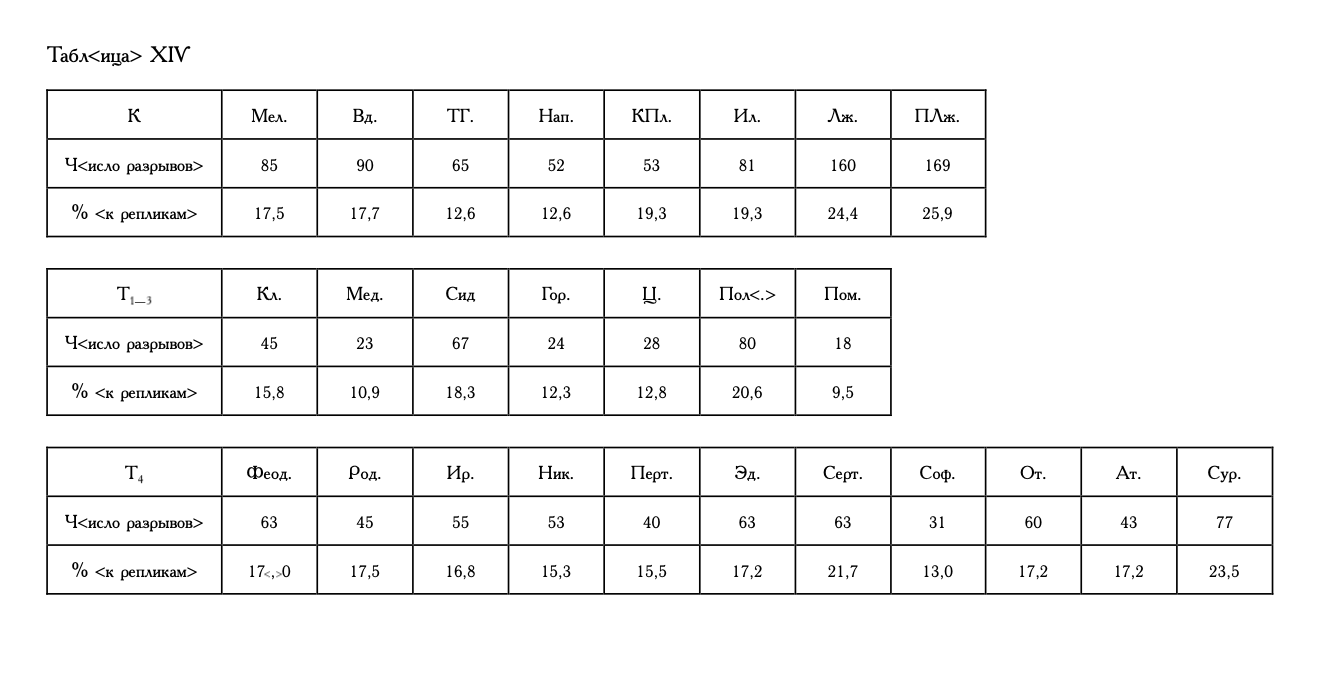

In [49]:
breaking_verses_ratios = separate_value_by_genre('breaking_verses_ratio')

In [50]:
breaking_verses_ratios['comedy'].mean()

0.18954241074905548

In [51]:
breaking_verses_ratios['tragedy13'].mean()

0.14481828377279077

In [52]:
breaking_verses_ratios['tragedy4'].mean()

0.17592242547975787

In [53]:
breaking_verses_ratios['tragedy'].mean()

0.16382637037149286

#### Стилистическая связность

In [54]:
###########################
###########################
###########################
###########################
###########################

### Распределение речи

#### Кривая распределения

In [55]:
###########################
###########################
###########################
###########################
###########################

#### Использование персонажей в диалоге

##### Немые роли

In [56]:
###########################
###########################
###########################
###########################
###########################

##### Неиспользованные персонажи

In [57]:
###########################
###########################
###########################
###########################
###########################

## Персонажи